### CII (cib x cib)

In [2]:
# install dependencies

import emcee
import matplotlib.pyplot as plt
import numpy as np
import os, sys, shutil
import pandas as pd

pkdir = "/pscratch/sd/s/sbrisin/cibcmass/hmvec"
sys.path.insert(0,pkdir)

#import hmvec as hm
from hmvec import hmvec as hm 
from scipy.interpolate import interp1d

In [3]:
# CIB frequency in Hz
cib_freq = 545 * 1e9

zs = np.linspace(0.001,6,20)
ms = np.geomspace(1e10,1e17,200)
ks = np.geomspace(1e-4,100,1001)
hcos = hm.HaloModel(zs,ks,ms=ms)

# Initialize CIB halo model # 'vierro' is for the model from arXiv:1208.5049
hcos.set_cibParams('vierro')

hcos.add_hod(name="CMASS",mthresh=10**12+zs*0.)

/pscratch/sd/s/sbrisin/cibcmass/hmvec/hmvec/hmvec.py:994: RuntimeWarning: invalid value encountered in true_divide
  ret = Ns**2./Nc


In [13]:
data = pd.read_csv('crosses.csv')
data = pd.DataFrame(data)
data

cii = data['ciib']
l = data['l']

In [5]:
hcos.cib_params['alpha'] = 0.2
hcos.cib_params['beta'] = 1.6
hcos.cib_params['gamma'] = 1.7 # not in Viero, so using Planck13
hcos.cib_params['delta'] = 2.4
hcos.cib_params['Td_o'] = 20.7
hcos.cib_params['logM_eff'] = 12.3 # vqry n sre
hcos.cib_params['var'] = 0.3
hcos.cib_params['L_o'] = 2e-7 # vary n see n plot w prob

Text(0.5, 1.0, 'CIB cross CIB')

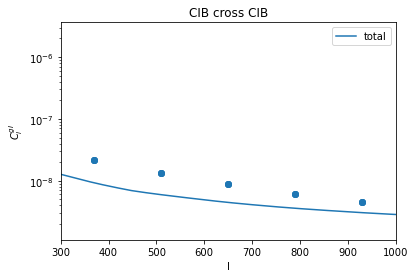

In [12]:
ells = np.arange(3000)

# 3D cross-spectra of CIB x galaxies at (zs, ks)
PiI_1h = hcos.get_power_1halo('cib', nu_obs=np.array([cib_freq])) # put this back in hertz
PiI_2h = hcos.get_power_2halo('cib', nu_obs=np.array([cib_freq])) # put this back in hertz
# Project to 2D to get the Cls
Cl_iI_1h = hcos.C_ii(ells, hcos.zs, hcos.ks, PiI_1h)
Cl_iI_2h = hcos.C_ii(ells, hcos.zs, hcos.ks, PiI_2h)
# Plot
plt.plot((Cl_iI_1h+ Cl_iI_2h ) * 1e-12/(4*np.pi), label='total', ls='-')
#plt.plot(Cl_iI_1h  * 1e-12, label='1 halo term', ls='--')
#plt.plot(Cl_iI_2h  * 1e-12, label='2 halo term', ls=':')
plt.scatter(l,cii)

plt.xlabel(r'l')
plt.yscale('log')
plt.xlim([300,1000])

plt.legend()
plt.ylabel(r'$C^{II}_l$')
plt.title('CIB cross CIB')

#in mega jensky ^2 per sr for data

### CHECK WHERE THE 4 PI IS FROM

(300.0, 1000.0)

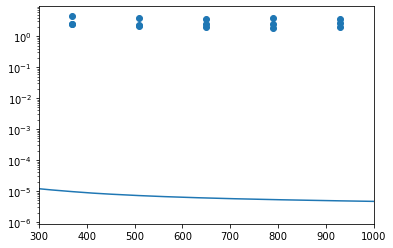

In [52]:
plt.plot(Cl_gI_1h + Cl_gI_2h, label='total', ls='-')
plt.scatter(l,cggb/(binned_cross + binned_cross2))
plt.yscale('log')
plt.xlim([300,1000])

In [61]:
data = pd.read_csv('crosses.csv')
data = pd.DataFrame(data)
data

lb = data['l']
clb = data['cl']
cbr = data['err']
z  = data['z']

lb45 = lb[z == '.4-.5']
cl45 = clb[z == '.4-.5']
cbr45 = cbr[z == '.4-.5']
lb56 =lb[z == '.5-.6']
cl56 = clb[z == '.5-.6']
cbr56 = cbr[z == '.5-.6']
lb68 = lb[z == '.6-.8']
cl68 = clb[z == '.6-.8']
cbr68 = cbr[z == '.6-.8']